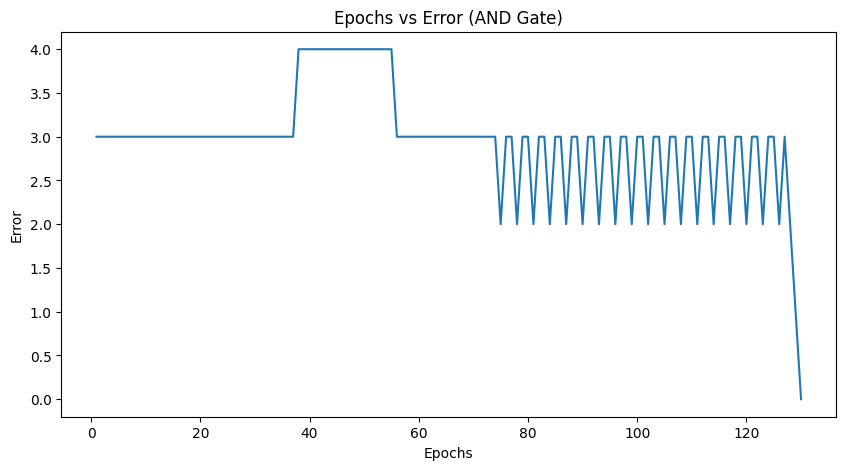

In [32]:
# A1
import numpy as np
import matplotlib.pyplot as plt
W=np.array([10,0.2,-0.75])
alpha=0.05
def step_function(x):
    return 1 if x>=0 else 0
def update_weights(W,X,Y,alpha):
    error=0
    for i in range(len(X)):
        y_pred=step_function(np.dot(X[i],W))
        error+=(Y[i]-y_pred)**2
        delta=alpha*(Y[i]-y_pred)
        W+=delta*X[i]
    return W,error
X_and=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
Y_and=np.array([0,0,0,1])
epochs_and=0
error_values_and=[]
while True:
    W,error=update_weights(W,X_and,Y_and,alpha)
    error_values_and.append(error)
    epochs_and+=1
    if error<=0.002 or epochs_and>=1000:
        break
plt.figure(figsize=(10,5))
plt.plot(range(1,epochs_and+1),error_values_and)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error (AND Gate)')
plt.show()

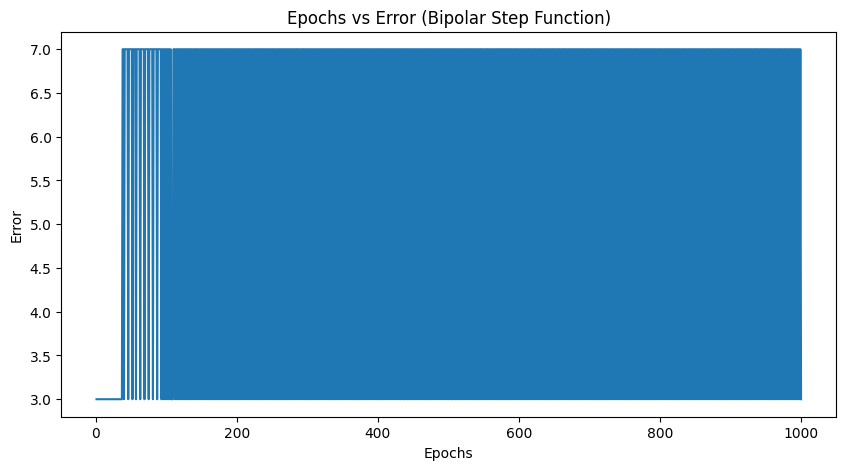

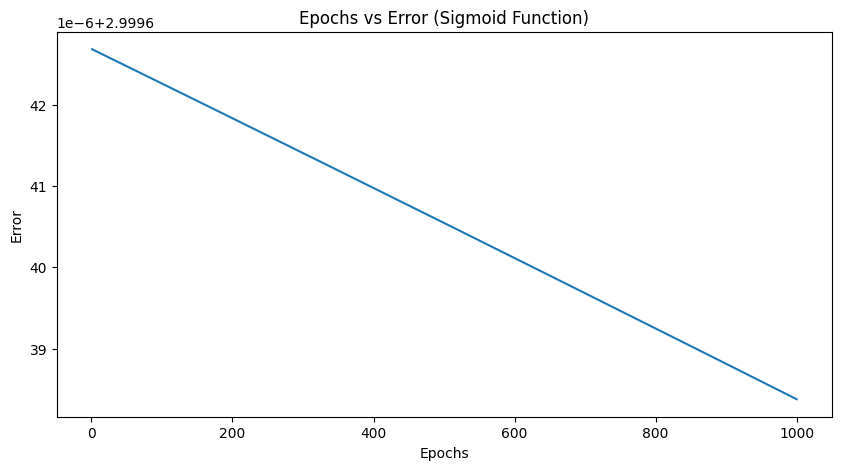

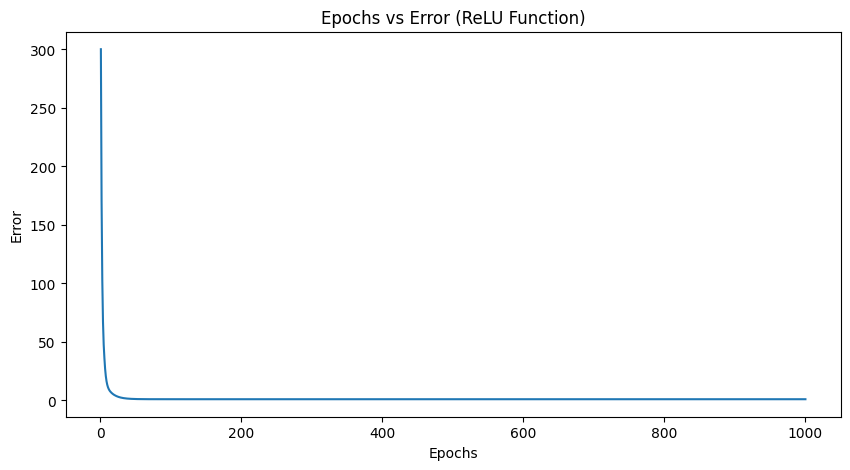

In [33]:
# A2
def bipolar_step_function(x):
    return 1 if x>=0 else -1
def update_weights_bipolar(W,X,Y,alpha):
    error=0
    for i in range(len(X)):
        y_pred=bipolar_step_function(np.dot(X[i],W))
        error+=(Y[i]-y_pred) ** 2
        delta=alpha*(Y[i]-y_pred)
        W+=delta*X[i]
    return W,error
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def update_weights_sigmoid(W,X,Y,alpha):
    error=0
    for i in range(len(X)):
        y_pred=sigmoid(np.dot(X[i],W))
        error+=(Y[i]-y_pred) ** 2
        delta=alpha*(Y[i]-y_pred)*y_pred*(1-y_pred)
        W+=delta*X[i]
    return W,error
def relu(x):
    return max(0,x)
def update_weights_relu(W,X,Y,alpha):
    error=0
    for i in range(len(X)):
        y_pred=relu(np.dot(X[i],W))
        error+=(Y[i]-y_pred) ** 2
        delta=alpha*(Y[i]-y_pred)*(1 if y_pred > 0 else 0)
        W+=delta*X[i]
    return W,error
W=np.array([10,0.2,-0.75])
epochs_bipolar=0
error_values_bipolar=[]
while True:
    W,error=update_weights_bipolar(W,X_and,Y_and,alpha)
    error_values_bipolar.append(error)
    epochs_bipolar+=1
    if error<=0.002 or epochs_bipolar>=1000:
        break
plt.figure(figsize=(10,5))
plt.plot(range(1,epochs_bipolar+1),error_values_bipolar)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error (Bipolar Step Function)')
plt.show()
W=np.array([10,0.2,-0.75])
epochs_sigmoid=0
error_values_sigmoid=[]
while True:
    W,error=update_weights_sigmoid(W,X_and,Y_and,alpha)
    error_values_sigmoid.append(error)
    epochs_sigmoid+=1
    if error<=0.002 or epochs_sigmoid>=1000:
        break
plt.figure(figsize=(10,5))
plt.plot(range(1,epochs_sigmoid+1),error_values_sigmoid)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error (Sigmoid Function)')
plt.show()
W=np.array([10,0.2,-0.75])
epochs_relu=0
error_values_relu=[]
while True:
    W,error=update_weights_relu(W,X_and,Y_and,alpha)
    error_values_relu.append(error)
    epochs_relu+=1
    if error<=0.002 or epochs_relu>=1000:
        break
plt.figure(figsize=(10,5))
plt.plot(range(1,epochs_relu+1),error_values_relu)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error (ReLU Function)')
plt.show()

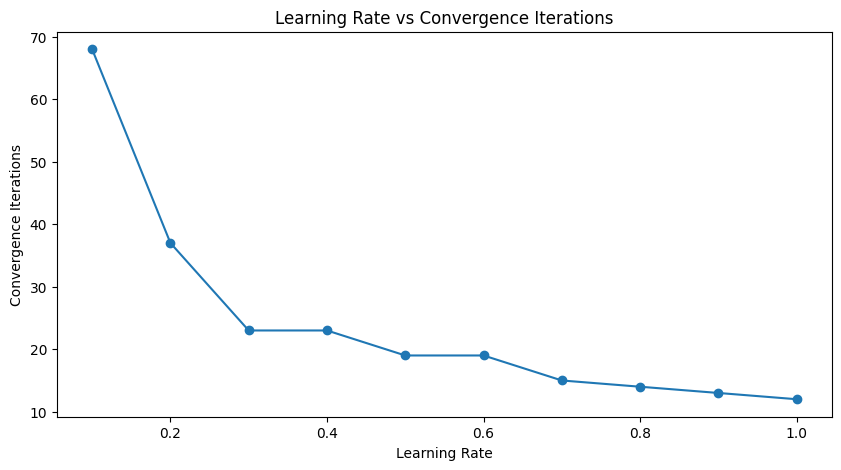

In [22]:
# A3: Varying Learning Rates
learning_rates=np.arange(0.1,1.1,0.1)
convergence_iterations=[]
for alpha in learning_rates:
    W=np.array([10,0.2,-0.75])
    epochs=0
    while True:
        W,error=update_weights(W,X_and,Y_and,alpha)
        epochs+=1
        if error<=0.002 or epochs>=1000:
            break
    convergence_iterations.append(epochs)
plt.figure(figsize=(10,5))
plt.plot(learning_rates,convergence_iterations,marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Convergence Iterations')
plt.title('Learning Rate vs Convergence Iterations')
plt.show()

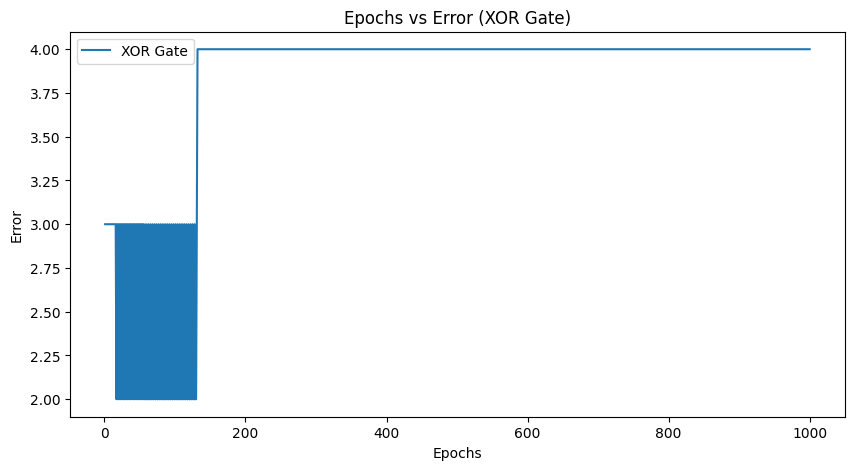

In [23]:
# A4: XOR Gate Logic
learning_rate=0.05
X_xor=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
Y_xor=np.array([0,1,1,0])
epochs_xor=0
error_values_xor=[]
while True:
    W,error=update_weights(W,X_xor,Y_xor,learning_rate)
    error_values_xor.append(error)
    epochs_xor+=1
    if error<=0.002 or epochs_xor>=1000:
        break
plt.figure(figsize=(10,5))
plt.plot(range(1,epochs_xor+1),error_values_xor,label='XOR Gate')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs Error (XOR Gate)')
plt.legend()
plt.show()

In [34]:
# A5
data=np.array([
    [20,6,2,386,1],
    [16,3,6,289,1],
    [27,6,2,393,1],
    [19,1,2,110,0],
    [24,4,2,280,1],
    [22,1,5,167,0],
    [15,4,2,271,1],
    [18,4,2,274,1],
    [21,1,4,148,0],
    [16,2,4,198,0]
])
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
weights=np.random.rand(5)
learning_rate=0.01
def perceptron_learn(data,weights,learning_rate,epochs):
    for epoch in range(epochs):
        total_error=0
        for row in data:
            x=row[:-1]
            y_true=row[-1]
            y_pred=sigmoid(np.dot(x,weights[1:]) + weights[0])
            error=y_true-y_pred
            weights[1:]+=learning_rate*error*y_pred*(1-y_pred)*x
            weights[0]+=learning_rate*error*y_pred*(1-y_pred)
            total_error+=abs(error)
        if total_error == 0:
            print(f'Converged at epoch {epoch+1}')
            break
    return weights
trained_weights=perceptron_learn(data,weights,learning_rate,epochs=10000)
def classify_transaction(x,weights):
    y_pred=sigmoid(np.dot(x,weights[1:]) + weights[0])
    return 'High Value' if y_pred>=0.5 else 'Low Value'
test_transactions=[
    [23,5,3,290],
    [17,3,3,150],
    [21,5,2,310],
    [15,2,5,120]
]
for transaction in test_transactions:
    classification=classify_transaction(transaction,trained_weights)
    print(f'Transaction {transaction} is classified as: {classification}')

Transaction [23, 5, 3, 290] is classified as: High Value
Transaction [17, 3, 3, 150] is classified as: High Value
Transaction [21, 5, 2, 310] is classified as: High Value
Transaction [15, 2, 5, 120] is classified as: High Value
